<h1>24MAI0111 ANMOL CHAUBEY</h1>

<h3>For this task I have taken the Customer Feedback dataset which contains 200 plus customer reviews exteacted from amazon.com </h3>

<h3>1.) Importing the Libraries</h3>

In [22]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from wordcloud import WordCloud

nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to C:\Users\Anmol
[nltk_data]     Chaubey\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

<h3>2.) Data Ingestion</h3>

In [3]:
df=pd.read_csv("redmi6.csv", encoding="ISO-8859-1")

In [4]:
df.head()

,Review Title,Customer name,Rating,Date,Category,Comments,Useful
0,Another Midrange killer Smartphone by Xiaomi,Rishikumar Thakur,4.0 out of 5 stars,on 1 October 2018,Display,Another Midrange killer Smartphone by Xiaomi\n...,
1,vry small size mobile,Raza ji,3.0 out of 5 stars,on 15 September 2018,Others,All ok but vry small size mobile,7 people found this helpful
2,Full display not working in all application.,Vaibhav Patel,3.0 out of 5 stars,on 18 September 2018,Others,Quite good,7 people found this helpful
3,Value for Money,Amazon Customer,5.0 out of 5 stars,on 28 September 2018,Display,Redmi has always have been the the king of bud...,2 people found this helpful
4,Not worth for the money,Sudhakaran Wadakkancheri,2.0 out of 5 stars,on 18 September 2018,Others,worst product from MI. I am a hardcore fan of ...,6 people found this helpful


<h3>3.) Data Cleaning</h3>

Removing unnecessary characters from the comments and handle missing values

In [7]:
df['Comments'] = df['Comments'].fillna("").apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', x))

Converting the Rating column to numeric by extracting numbers

In [8]:
df['Rating'] = df['Rating'].apply(lambda x: float(re.search(r'\d+\.\d+', x).group()) if pd.notnull(x) else np.nan)

Converting Date to a datetime object

In [9]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

Drop any rows with missing dates

In [10]:
df.dropna(subset=['Date'], inplace=True)

<h3>4.) Sentiment Analysis</h3>

In [11]:
# Initialize Sentiment Analyzer
sia = SentimentIntensityAnalyzer()

# Classify feedback as positive, neutral, or negative
def get_sentiment(comment):
    score = sia.polarity_scores(comment)
    if score['compound'] >= 0.05:
        return 'Positive'
    elif score['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['Sentiment'] = df['Comments'].apply(get_sentiment)

<h3>5.) Trand Analysis</h3>

Analyze sentiment distribution over time

In [12]:
daily_sentiment = df.groupby(['Date', 'Sentiment']).size().unstack().fillna(0)

Calculate average rating per category and count of feedback

In [13]:
channel_summary = df.groupby('Category').agg({
    'Rating': 'mean',
    'Sentiment': lambda x: (x == 'Positive').sum() / x.count() * 100
}).reset_index().rename(columns={'Rating': 'Average Rating', 'Sentiment': 'Positive Feedback (%)'})

Determine the most positive and negative channels

In [14]:
most_positive_channel = channel_summary.loc[channel_summary['Positive Feedback (%)'].idxmax()]
most_negative_channel = channel_summary.loc[channel_summary['Positive Feedback (%)'].idxmin()]

<h3>6.) DATA VISUALIZATION</h3>

Sentiment distribution over time

<Figure size 1000x600 with 0 Axes>

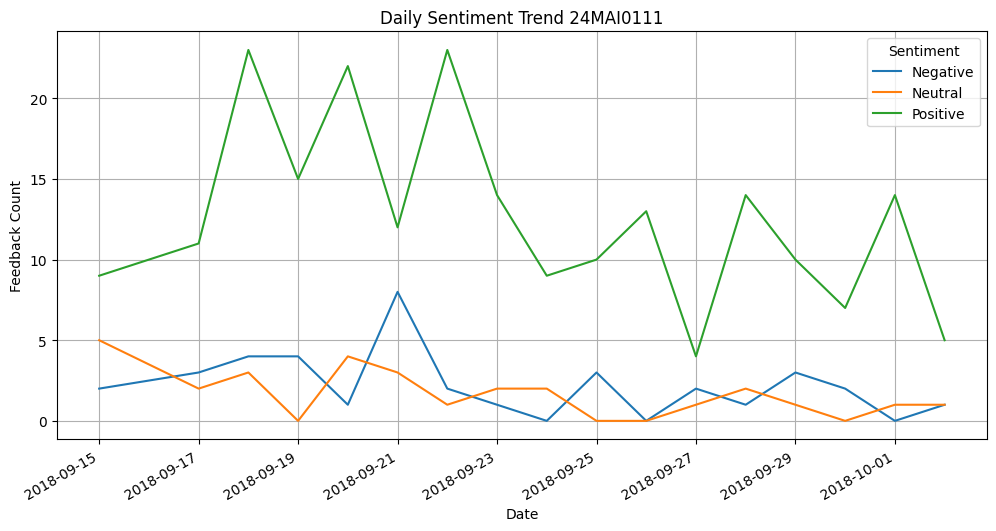

In [21]:
plt.figure(figsize=(10, 6))
daily_sentiment.plot(kind='line', figsize=(12, 6))
plt.title("Daily Sentiment Trend 24MAI0111")
plt.xlabel("Date")
plt.ylabel("Feedback Count")
plt.legend(title="Sentiment")
plt.grid()
plt.show()

Average rating per category

C:\Users\Anmol Chaubey\AppData\Local\Temp\ipykernel_19540\3992540818.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=channel_summary, x='Category', y='Average Rating', palette="viridis")


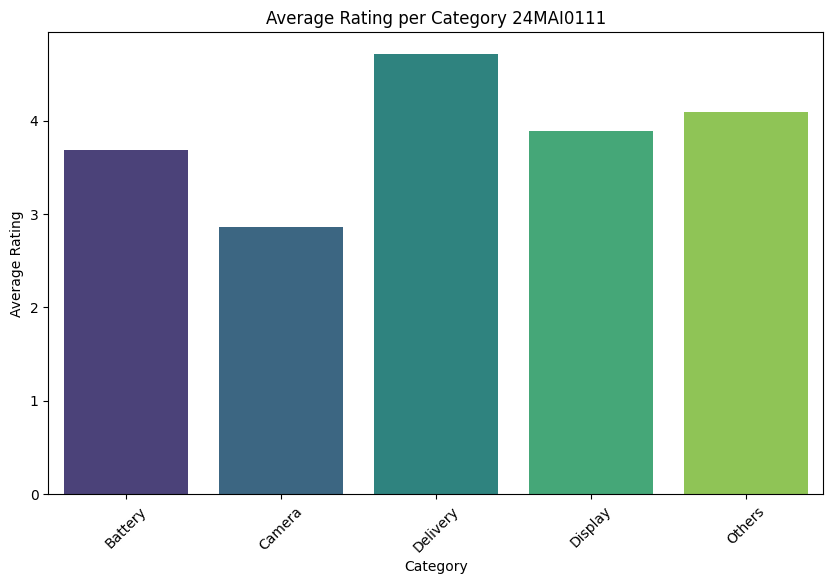

In [20]:
plt.figure(figsize=(10, 6))
sns.barplot(data=channel_summary, x='Category', y='Average Rating', palette="viridis")
plt.title("Average Rating per Category 24MAI0111")
plt.xticks(rotation=45)
plt.ylabel("Average Rating")
plt.show()

Sentiment distribution by category

C:\Users\Anmol Chaubey\AppData\Local\Temp\ipykernel_19540\2571104619.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=channel_summary, x='Category', y='Positive Feedback (%)', palette="coolwarm")


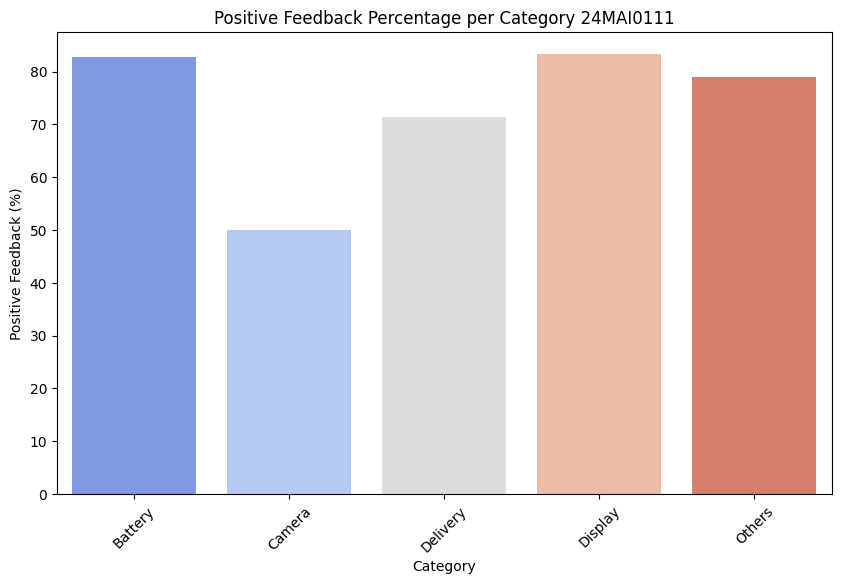

In [19]:
plt.figure(figsize=(10, 6))
sns.barplot(data=channel_summary, x='Category', y='Positive Feedback (%)', palette="coolwarm")
plt.title("Positive Feedback Percentage per Category 24MAI0111")
plt.xticks(rotation=45)
plt.ylabel("Positive Feedback (%)")
plt.show()

<h3>7.) Generate the report</h3>

In [18]:
print("**Feedback Analysis Summary**")
print(f"Most Positive Category: {most_positive_channel['Category']} with {most_positive_channel['Positive Feedback (%)']:.2f}% positive feedback.")
print(f"Most Negative Category: {most_negative_channel['Category']} with {most_negative_channel['Positive Feedback (%)']:.2f}% positive feedback.")
print("\nChannel-wise Summary:")
print(channel_summary[['Category', 'Average Rating', 'Positive Feedback (%)']])

**Feedback Analysis Summary**
Most Positive Category: Display with 83.33% positive feedback.
Most Negative Category: Camera with 50.00% positive feedback.

Channel-wise Summary:
   Category  Average Rating  Positive Feedback (%)
0   Battery        3.689655              82.758621
1    Camera        2.857143              50.000000
2  Delivery        4.714286              71.428571
3   Display        3.888889              83.333333
4    Others        4.094444              78.888889


<h3>8.) Sentiment Counts</h3>

Count the number of each sentiment type

In [23]:
sentiment_counts = df['Sentiment'].value_counts()
print("Sentiment Counts:\n", sentiment_counts)

Sentiment Counts:
 Sentiment
Positive    215
Negative     37
Neutral      28
Name: count, dtype: int64


<h3>9.) Overall Average Rating</h3>

Calculate the overall average rating

In [24]:
overall_avg_rating = df['Rating'].mean()
print(f"Overall Average Rating: {overall_avg_rating:.2f}")

Overall Average Rating: 3.92


<h3>10.) Top Positive and Negative Comments</h3>

Display top 5 most positive and most negative comments

In [25]:
positive_comments = df[df['Sentiment'] == 'Positive']['Comments'].head(5)
negative_comments = df[df['Sentiment'] == 'Negative']['Comments'].head(5)
print("Top Positive Comments:\n", positive_comments)
print("\nTop Negative Comments:\n", negative_comments)

Top Positive Comments:
 0    Another Midrange killer Smartphone by Xiaomi\n...
1                     All ok but vry small size mobile
2                                           Quite good
3    Redmi has always have been the the king of bud...
5    Over prised by at least around Rs1000 Low ligh...
Name: Comments, dtype: object

Top Negative Comments:
 4     worst product from MI I am a hardcore fan of M...
7             Front camera is poor rest things are good
14    worst product from MI I am a hardcore fan of M...
17            Front camera is poor rest things are good
27    Camera clarity is not good and average mobile ...
Name: Comments, dtype: object


<h3>11.) Sentiment by Rating Analysis</h3>

Group by Rating and Sentiment

In [26]:
rating_sentiment = df.groupby(['Rating', 'Sentiment']).size().unstack(fill_value=0)
print("Sentiment Counts by Rating:\n", rating_sentiment)

Sentiment Counts by Rating:
 Sentiment  Negative  Neutral  Positive
Rating                                
1.0              18        9        16
2.0               6        0         3
3.0               4        3        20
4.0               6        3        41
5.0               3       13       135


<h3>12.) Monthly Sentiment Trend</h3>
Extract month-year and group by it

In [27]:
df['Month-Year'] = df['Date'].dt.to_period('M')
monthly_sentiment = df.groupby(['Month-Year', 'Sentiment']).size().unstack().fillna(0)

Plot the trend

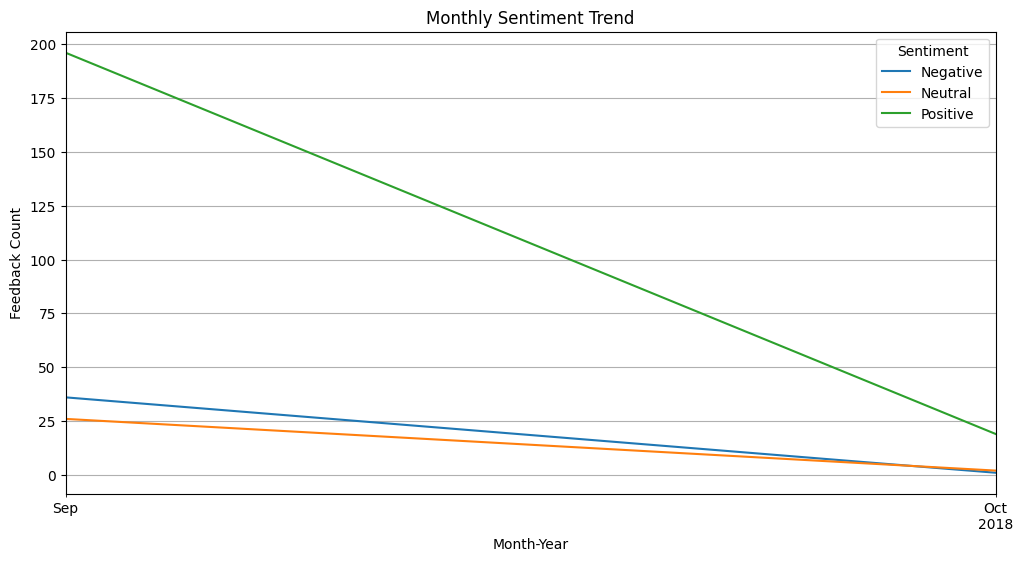

In [28]:
monthly_sentiment.plot(kind='line', figsize=(12, 6))
plt.title("Monthly Sentiment Trend")
plt.xlabel("Month-Year")
plt.ylabel("Feedback Count")
plt.legend(title="Sentiment")
plt.grid()
plt.show()

<h3>13.) Heatmap of Ratings vs. Sentiment</h3>

Pivot table for heatmap

In [29]:
rating_sentiment_pivot = df.pivot_table(index='Rating', columns='Sentiment', aggfunc='size', fill_value=0)


Plot heatmap

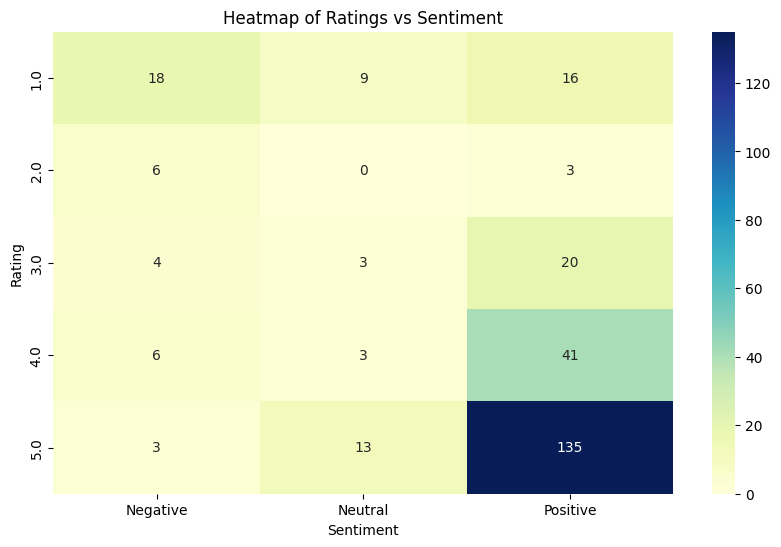

In [30]:
plt.figure(figsize=(10, 6))
sns.heatmap(rating_sentiment_pivot, annot=True, cmap="YlGnBu", fmt='d')
plt.title("Heatmap of Ratings vs Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Rating")
plt.show()

<h3>14.) Word Cloud for Positive and Negative Comments</h3>

Word Cloud for Positive Comments

In [31]:
positive_text = ' '.join(df[df['Sentiment'] == 'Positive']['Comments'])
wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

Display Positive Word Cloud

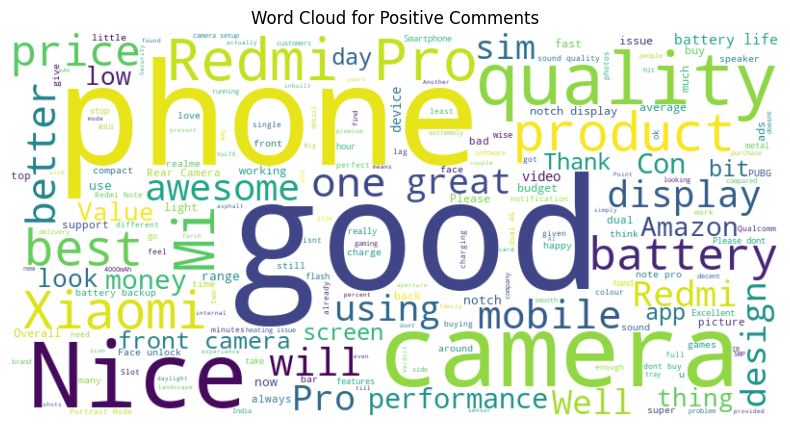

In [32]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Positive Comments")
plt.show()


Word Cloud for Negative Comments

In [33]:
negative_text = ' '.join(df[df['Sentiment'] == 'Negative']['Comments'])
wordcloud_neg = WordCloud(width=800, height=400, background_color='black').generate(negative_text)

Display Negative Word Cloud

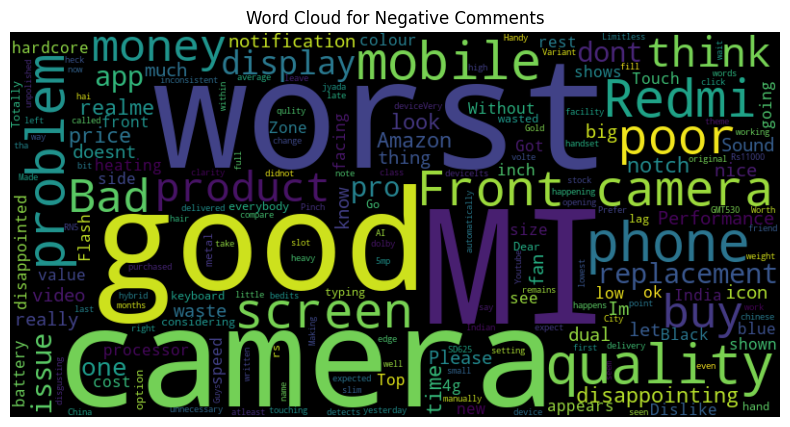

In [34]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Negative Comments")
plt.show()